In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import math
import random
import numpy as np
import pandas as pd
import scipy.stats as st
from statsmodels.distributions.empirical_distribution import ECDF

## "All of Statistics: A Concise Course in Statistical Inference" 

### Chapter 4: Inequalities

**Problem 4 (a)** Let $X_1,\dots,X_n\sim\text{Bernoulli}(p)$. Let $\alpha>0$ be fixed and $\epsilon_n=\sqrt{\frac1{2n}\log\left(\frac2\alpha\right)}$. Let $\hat p_n = \bar X_n$ be the sample mean. Define the confidence interval $C_n = (\hat p_n - \epsilon_n, \hat p_n + \epsilon_n)$. Use Hoeffding's inequality to show that $\mathbb{P}(C_n\text{ contains }p)\ge1-\alpha$.

**(b)** Let $\alpha=0.05$ and $p=0.4$. Conduct a simulation study to see how often the interval contains p (called the coverage). Do this for various values of $n$ between $1$ and $10000$. Plot the coverage versus $n$.

**(c)** Plot the length of the interval versus $n$. Suppose we want the length of the interval to be no more than $0.05$. How large should $n$ be?

In [2]:
# part (b)

@np.vectorize
def epsilon(n,alpha):
    '''from Hoeffding's inequality'''
    return math.sqrt(math.log(2/alpha)/(2*n))

def estimate_coverage(m,n,p,alpha):
    '''Generate sample mean random variates and output the fraction of those that lie in the confidence interval.
    m is number of sample means and n the size of each sample.'''
    variables  = st.bernoulli.rvs(p, size = n*m)
    sample_means = np.mean(variables.reshape((n,m)), axis=0)
    hits = ((sample_means >= p - epsilon(n,alpha)) & (sample_means <= p + epsilon(n,alpha)))
    return hits.sum()/m

In [3]:
alpha = 0.2 # upper bound on expected fraction of means outside the confidence interval
p = .4 # probability for Bernoulli process
n = 10 # number of samples of which we take the mean
m = 1000 # number of sample mean variates computed to estimate the coverage

print(estimate_coverage(m,n,p,alpha))
print(epsilon(n, alpha))

0.981
0.3393070212207556


**I'm either making a mistake or the coverage is vastly underestimated by the definition of this confidence interval.**

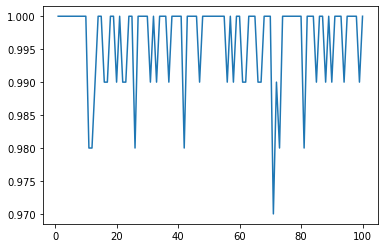

In [4]:
alpha = .05 # upper bound on expected fraction of means outside the confidence interval
p = .4 # probability for Bernoulli process
m = 100 # number of sample mean variates computed to estimate the coverage

x = np.linspace(1,100,100, dtype='int')
y = []

for n in x:
    y.append(estimate_coverage(m,n,p,alpha))
    
fig, ax = plt.subplots(1)
ax.plot(x,y);

0.049992407649266275

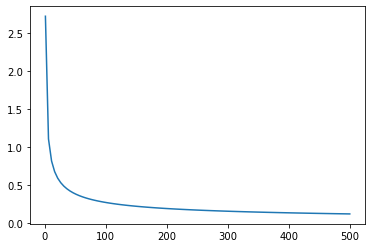

In [5]:
# part (c)

fig, ax = plt.subplots(1)

x = np.linspace(1,500,100)

y = 2*epsilon(x,alpha)

ax.plot(x,y)

2*epsilon(2952,alpha) #This is the smallest n for which the interval length is under 0.05

**Problem 6** Let $Z\sim\text{N}(0,1)$. Find $\mathbb{P}(|Z|>t)$ and plot this as a function of $t$. From Markov's inequality, we have the bound $\mathbb{P}(|Z|>t)\le\frac{\mathbb{E}(|Z|^k)}{t^k}$ for any $k>0$. Plot these bounds for $k=1,2,3,4,5$ and compare them to the true value of $\mathbb{P}(|Z|>t)$. Also plot the bound from Mill's inequality.

Clearly (for $t\ge0$): $\mathbb{P}(|Z|>t)=2\mathbb{P}(Z>t)=2(1-\mathbb{P}(Z\le t)) = 2 -2 \Phi(t)$

In [6]:
x = np.linspace(0.1,4,40)

@np.vectorize
def bound(x,k):
    return st.norm.expect(lambda x: abs(x)**k)/(x**k)

In [7]:
for k in range(5):
    print(bound(1,k))

0.9999999999999998
0.7978845608028651
1.000000000000001
1.5957691216057308
3.0000000000000053


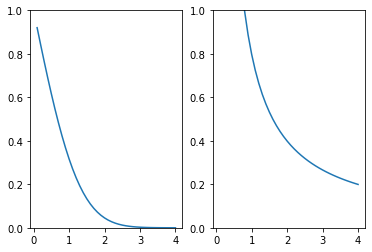

In [8]:
fig, axs = plt.subplots(1,2)

k=1

axs[0].plot(x,2-2*st.norm.cdf(x)); #Could also have used st.norm.sf(x) (survival function = 1 - CDF)
axs[0].set_ylim([0,1]);
axs[1].plot(x,bound(x,k));
axs[1].set_ylim([0,1]);

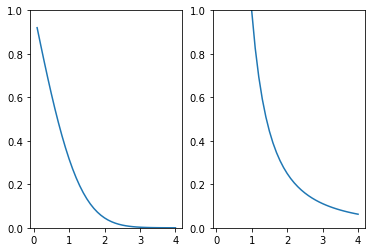

In [9]:
fig, axs = plt.subplots(1,2)

k=2

axs[0].plot(x,2-2*st.norm.cdf(x));
axs[0].set_ylim([0,1]);
axs[1].plot(x,bound(x,k));
axs[1].set_ylim([0,1]);

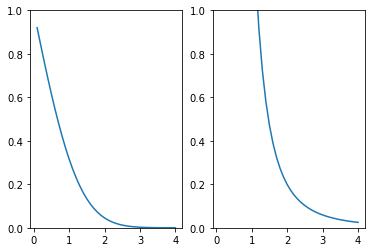

In [10]:
fig, axs = plt.subplots(1,2)

k=3

axs[0].plot(x,2-2*st.norm.cdf(x));
axs[0].set_ylim([0,1]);
axs[1].plot(x,bound(x,k));
axs[1].set_ylim([0,1]);

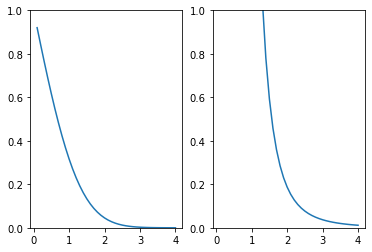

In [11]:
fig, axs = plt.subplots(1,2)

k=4

axs[0].plot(x,2-2*st.norm.cdf(x));
axs[0].set_ylim([0,1]);
axs[1].plot(x,bound(x,k));
axs[1].set_ylim([0,1]);

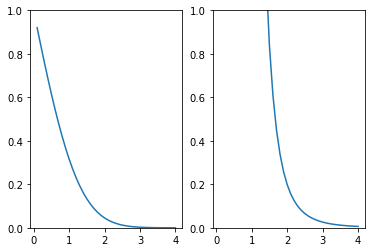

In [12]:
fig, axs = plt.subplots(1,2)

k=5

axs[0].plot(x,2-2*st.norm.cdf(x));
axs[0].set_ylim([0,1]);
axs[1].plot(x,bound(x,k));
axs[1].set_ylim([0,1]);

(0.0, 1.0)

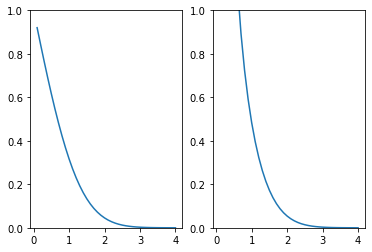

In [13]:
# Mill's inequality sqrt(2/pi) e^{-t^2/2} / t

@np.vectorize
def mill(t):
    return np.sqrt(2/np.pi)*np.exp(-t**2/2) / t

fig, axs = plt.subplots(1,2)

axs[0].plot(x,2-2*st.norm.cdf(x))
axs[0].set_ylim([0,1])
axs[1].plot(x,mill(x))
axs[1].set_ylim([0,1])

### Chapter 7: Estimating the CDF and Statistical Functionals

**Problem 3** Generate 100 observations from a $N(0,1)$ distribution. Compute a 95 percent confidence band for the CDF (as described in the appendix **(this is a typo: Chapter 7 doesn't have an appendix**). Repeat this 1000 times and see how often the confidence band contains the true distribution function. Repeat using data from a Cauchy distribution.

**Note** Since there is no appendix in Chapter 7 and no appendix at the end of the book (and this is aknowledged as an error in the errata of the book), I decided to construct the confidence bands with the two methods introduced in Chapter 7: The approximate confidence band coming from the CLT and the confidence band coming from the DKW inequality.

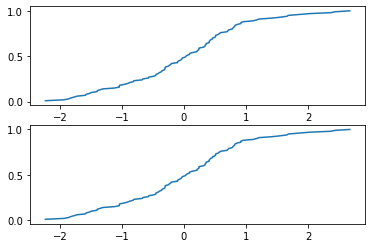

In [14]:
normal = st.norm.rvs(size=100)

def ecdf(x): # Implementation "from scratch"
    xs = np.sort(x)
    ys = np.arange(1, len(xs) + 1) / len(xs)
    return xs, ys

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(*ecdf(normal))
ax2.plot(ECDF(normal).x, ECDF(normal).y); #ECDF is from statsmodels

Now we compute the approximate confidence bands based on approximate normality coming from the CLT.

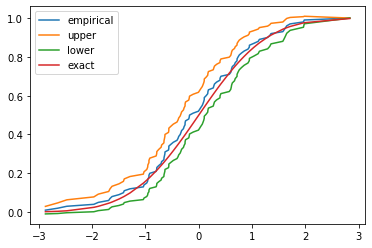

In [15]:
normal = st.norm.rvs(size=100)
emp = ECDF(normal)
upper = emp.y + 1.96 * np.sqrt((emp.y - emp.y**2)/len(emp.y))
lower = emp.y - 1.96 * np.sqrt((emp.y - emp.y**2)/len(emp.y))
exact = st.norm.cdf(emp.x)

plt.plot(emp.x, emp.y, label='empirical')
plt.plot(emp.x, upper, label='upper')
plt.plot(emp.x, lower, label='lower')
plt.plot(emp.x, exact, label='exact')
plt.legend();

Next we check how often the real CDF is within these confidence bands.

In [16]:
coverages = []
count = 0
reps = 1000
sample_size = 100
threshold = (sample_size + 1) * 0.95

for _ in range(reps):
    normal = st.norm.rvs(size=sample_size)
    emp = ECDF(normal)
    lower = emp.y - 1.96 * np.sqrt((emp.y - emp.y**2)/len(emp.y))
    upper = emp.y + 1.96 * np.sqrt((emp.y - emp.y**2)/len(emp.y))
    exact = st.norm.cdf(emp.x)
    coverage = ((lower <= exact) & (exact <= upper)).sum()
    coverages.append(coverage)
    if coverage >= threshold:
        count+=1

print(count/reps)
# print(coverages)

0.685


Now let's look at the confidence band coming from the DKW inequality.

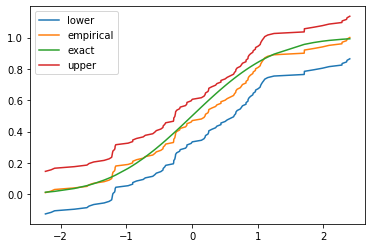

In [17]:
alpha = 0.05
sample_size = 100
normal = st.norm.rvs(size=sample_size)
ecdf = ECDF(normal)
dkw = np.sqrt( np.log(2/alpha) / (2*sample_size) )
plt.plot(ecdf.x, ecdf.y - dkw, label='lower')
plt.plot(ecdf.x, ecdf.y, label='empirical')
plt.plot(ecdf.x, st.norm.cdf(ecdf.x), label='exact')
plt.plot(ecdf.x, ecdf.y + dkw, label='upper')
plt.legend();

In [18]:
alpha = 0.05
sample_size = 100
reps = 1000
threshold = 1 * (sample_size +1)
coverages = []
count = 0

for _ in range(reps):
    normal = st.norm.rvs(size=sample_size)
    emp = ECDF(normal)
    dkw = np.sqrt( np.log(2/alpha) / (2*sample_size) )
    lower = emp.y - dkw
    upper = emp.y + dkw
    exact = st.norm.cdf(emp.x)
    coverage = ((lower <= exact) & (exact <= upper)).sum()
    coverages.append(coverage)
    if coverage >= threshold:
        count+=1

print(count/reps)

0.963


We see that the CLT based confidence band contains fewer ECDFs fully than the DKW inequality based confidence band, although it contains most of the ECDF most of the time. This is because the former is a pointwise confidence band (confidence interval for each individual value $\hat F_n(x)$) and the latter is a simultaneous confidence band (confidence interval for the whole function $\hat F_n$ in the supremum norm).

Now we will do the same for the Cauchy distribution.

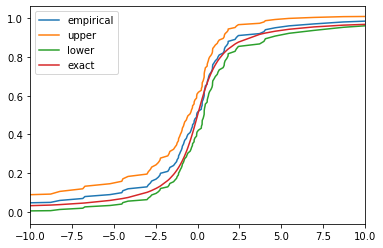

In [19]:
cauchy = st.cauchy.rvs(size=100)
emp = ECDF(cauchy)
upper = emp.y + 1.96 * np.sqrt((emp.y - emp.y**2)/(len(emp.y) - 1))
lower = emp.y - 1.96 * np.sqrt((emp.y - emp.y**2)/(len(emp.y) - 1))
exact = st.cauchy.cdf(emp.x)

plt.plot(emp.x, emp.y, label='empirical')
plt.plot(emp.x, upper, label='upper')
plt.plot(emp.x, lower, label='lower')
plt.plot(emp.x, exact, label='exact')
plt.xlim([-10,10])
plt.legend();

In [20]:
coverages = []
count = 0
reps = 1000
sample_size = 100
threshold = (sample_size + 1) * 0.95

for _ in range(reps):
    cauchy = st.cauchy.rvs(size=sample_size)
    emp = ECDF(cauchy)
    lower = emp.y - 1.96 * np.sqrt((emp.y - emp.y**2)/(len(emp.y) - 1))
    upper = emp.y + 1.96 * np.sqrt((emp.y - emp.y**2)/(len(emp.y) - 1))
    exact = st.cauchy.cdf(emp.x)
    coverage = ((lower <= exact) & (exact <= upper)).sum()
    coverages.append(coverage)
    if coverage >= threshold:
        count+=1

print(count/reps)
# print(coverages)

0.714


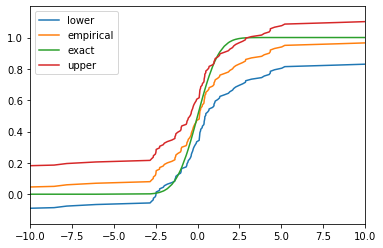

In [21]:
alpha = 0.05
sample_size = 100
cauchy = st.cauchy.rvs(size=sample_size)
ecdf = ECDF(cauchy)
dkw = np.sqrt( np.log(2/alpha) / (2*sample_size) )
plt.plot(ecdf.x, ecdf.y - dkw, label='lower')
plt.plot(ecdf.x, ecdf.y, label='empirical')
plt.plot(ecdf.x, st.norm.cdf(ecdf.x), label='exact')
plt.plot(ecdf.x, ecdf.y + dkw, label='upper')
plt.xlim([-10,10])
plt.legend();

In [22]:
alpha = 0.05
sample_size = 100
reps = 1000
threshold = 1 * (sample_size +1)
coverages = []
count = 0

for _ in range(reps):
    cauchy = st.cauchy.rvs(size=sample_size)
    emp = ECDF(cauchy)
    dkw = np.sqrt( np.log(2/alpha) / (2*sample_size) )
    lower = emp.y - dkw
    upper = emp.y + dkw
    exact = st.cauchy.cdf(emp.x)
    coverage = ((lower <= exact) & (exact <= upper)).sum()
    coverages.append(coverage)
    if coverage >= threshold:
        count+=1

print(count/reps)

0.961


**Problem 7** Data on the magnitudes of earthquakes near Fiji are available on the website for this book. Estimate the CDF $F(x)$. Compute and plot a 95 percent confidence envelope for $F$ (as described in the appendix) *(which, again, doesn't exist)*. Find an approximate 95 percent confidence  interval for F(4.9) - F(4.3).

Like before, I will use both the CLT and DKW confidence bands.

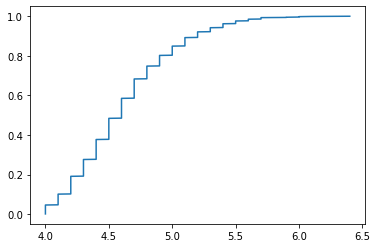

In [23]:
fiji = pd.read_csv('fiji.csv', delim_whitespace=True)
fiji.head()
magnitudes = fiji['mag']

emp = ECDF(magnitudes)
plt.plot(emp.x,emp.y);

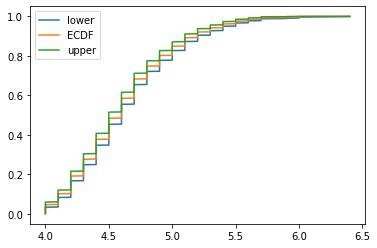

In [24]:
# CLT

lower = emp.y - 1.96 * np.sqrt((emp.y - emp.y**2)/(len(emp.y - 1)))
upper = emp.y + 1.96 * np.sqrt((emp.y - emp.y**2)/(len(emp.y - 1)))

plt.plot(emp.x, lower, label='lower')
plt.plot(emp.x, emp.y, label='ECDF')
plt.plot(emp.x, upper, label='upper')
plt.legend();

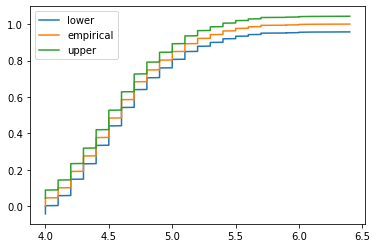

In [25]:
#DWK

alpha = 0.05
dkw = np.sqrt( np.log(2/alpha) / (2*(len(emp.x) - 1)) )

plt.plot(emp.x, emp.y - dkw, label='lower')
plt.plot(emp.x, emp.y, label='empirical')
plt.plot(emp.x, emp.y + dkw, label='upper')
plt.legend();

The variance of $\hat F_n(b) - \hat F_n(a)$ is given by $$\mathbb{V}(\hat F_n(a))+\mathbb{V}(\hat F_n(b))-2\text{Cov}(\hat F_n(a),\hat F_n(b)) = \frac{F(a)(1-F(a))}{n} + \frac{F(b)(1-F(b))}{n} - 2 \frac{F(a)(1-F(b))}{n} $$.

The approximate standard error is given by $$\hat{se} = \sqrt{\frac{\hat F_n(a)(1-\hat F_n(a)) + \hat F_n(b)(1-\hat F_n(b)) - 2\hat F_n(a)(1-\hat F_n(b))}{n}} = \sqrt{\frac{-\hat F_n(a)- \hat F_n(a)^2 + \hat F_n(b) - \hat F_n(b)^2 + 2\hat F_n(a) \hat F_n(b))}{n}}.$$

In [26]:
Fb = emp.y[emp.x == 4.9][-1]
Fa = emp.y[emp.x == 4.3][-1]

estimate = Fb - Fa

se_hat = np.sqrt( (-Fa - Fa**2 + Fb -  Fb**2 + 2*Fa*Fb) / (len(emp.x) - 1))

print(estimate, se_hat)

print(f'The approximate 95% confidence interval is given by [{estimate - 1.96 * se_hat:.4f}, {estimate + 1.96 * se_hat:.4f}]')

0.526 0.015789996833438565
The approximate 95% confidence interval is given by [0.4951, 0.5569]


**Problem 8** Get the data on eruption times and waiting times between eruptions of the Old Faithful geyser from the website. Estimate the mean waiting time and give a standard error for the estimate. Also, give a 90 percent confidence interval for the mean waiting time. Now estimate the median waiting time. In the next chapter we will see how to get the standard error for the median.

In [27]:
geyser = pd.read_csv('Old-Faithful-geyser.csv', delim_whitespace=True)

display(geyser.head(),geyser.describe())

# waiting is the waiting time from the current eruption to the next
# times are in minutes

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


,eruptions,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


First we estimate the mean and the standard error of that estimate. It would be reasonable to assume that the distribution of the waiting times is a Poisson distribution. However, at this point the book has only introduced nonparametric inference. The mean is simply estimated using the sample mean and the standard error by the square root of the mean of the square differences of the data points and the sample mean (which is the plug in estimator, but we could also use the sample standard deviation, with $n-1$ in the denominator instead of $n$).

In [28]:
est_mean = geyser['waiting'].mean()
est_se = np.sqrt(((geyser['waiting']  - geyser['waiting'].mean())**2).mean())

z = st.norm.ppf(.95)

print(f'The estimated waiting time is {est_mean:.2f}, the estimated standard error is {est_se:.2f}, and the standard normal quantile of 0.95 is {z:.2f}')

print(f'The approximate 90 % confidence interval is [{est_mean - z * est_se:.2f}, {est_mean + z * est_se:.2f}]')

The estimated waiting time is 70.90, the estimated standard error is 13.57, and the standard normal quantile of 0.95 is 1.64
The approximate 90 % confidence interval is [48.58, 93.22]


The estimate of the median waiting time is given by the preimage of $1/2$ under $\hat F_n$ (or the infimum of $\{x : \hat F_n(x) \ge 1/2\}$ in case $\hat F_n$ isn't invertible). But of course, that is essentially just the median of the data sample.

In [29]:
est_median = geyser['waiting'].median()
print(f'The estimated median waiting time is {est_median}')

The estimated median waiting time is 76.0


**Problem 9** 100 people are given a standard antibiotic to treat an infection and another 100 people are given a new antibiotic. In the first group, 90 people recover; in the second group, 85 people recover. Let $p_1$  be the probability of  recovery under the standard treatment and let $p_2$ be the probability of recovery under the new treatment. We  are interested in estimating $\theta = p_1  - p_2$. Provide  an  estimate, standard error, an 80 percent confidence  interval and a 95 percent confidence interval for $\theta$.

In [30]:
total1 = 100
recover1 = 90
p1_est = recover1 / total1
var1_est = (p1_est - p1_est**2) / total1

print(np.sqrt(var1_est))

total2 = 100
recover2 = 85
p2_est = recover2 / total2
var2_est = (p2_est - p2_est**2) / total1

theta_est  = p1_est - p2_est
theta_se_est = np.sqrt(var1_est + var2_est)
z_80 = st.norm.ppf(.90)
z_95 = st.norm.ppf(.975)

print(f'We estimate p_1 - p_2 as {theta_est:.4f}, with an estimated standard error of {theta_se_est:.4f}.')
print(f'An approximate 80 % confidence interval is [{theta_est - z_80 * theta_se_est:.4f}, {theta_est + z_80 * theta_se_est:.4f}]')
print(f'n approximate 95% confidence interval is [{theta_est - z_95 * theta_se_est:.4f}, {theta_est + z_95 * theta_se_est:.4f}]')

0.029999999999999995
We estimate p_1 - p_2 as 0.0500, with an estimated standard error of 0.0466.
An approximate 80 % confidence interval is [-0.0098, 0.1098]
n approximate 95% confidence interval is [-0.0414, 0.1414]


**Problem 10** In 1975, an experiment was conducted to see if cloud seeding produced rainfall. 26 clouds were seeded with silver  nitrate and 26 were not. The decision to seed or not  was made at random. Get the data from https://dasl.datadescription.com/datafile/cloud-seeding/ (I updated the link).

Let $\theta$ be the difference in the mean precipitation from the two groups. Estimate $\theta$. Estimate the standard error of the estimate and produce a 95 percent confidence interval.

In [31]:
clouds = pd.read_csv('cloud-seeding.txt', delim_whitespace=True)

clouds.head()

,Unseeded_Clouds,Seeded_Clouds
0,1202.6,2745.6
1,830.1,1697.8
2,372.4,1656.0
3,345.5,978.0
4,321.2,703.4


In [32]:
n = len(clouds['Seeded_Clouds'])

theta_est = clouds['Seeded_Clouds'].mean() - clouds['Unseeded_Clouds'].mean()

sample_var_seeded = ((clouds['Seeded_Clouds'] - clouds['Seeded_Clouds'].mean())**2).sum() / n
sample_var_unseeded = ((clouds['Unseeded_Clouds'] - clouds['Unseeded_Clouds'].mean())**2).sum() / n
theta_se_est = np.sqrt((sample_var_seeded + sample_var_unseeded) / n)

print(clouds['Seeded_Clouds'].mean(), np.sqrt(sample_var_seeded / n))
print(clouds['Unseeded_Clouds'].mean(), np.sqrt(sample_var_unseeded / n))

print(theta_est, theta_se_est)

z_95 = st.norm.ppf(.975)
print(f'An approximate 95% confidence interval is [{theta_est - z_95 * theta_se_est:.4f}, {theta_est + z_95 * theta_se_est:.4f}]')

441.9846153846155 125.15137907032575
164.58846153846156 53.54353930576738
277.39615384615394 136.12412822344402
An approximate 95% confidence interval is [10.5978, 544.1945]
